In [1]:
import pandas as pd
from segmentation_pipelines import extract_masks_old, save_as_memmap
from caiman import load_memmap
import scanreader

Bokeh could not be loaded. Either it is not installed or you are not running within a notebook
numba not found


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Define key to access desired scan from the database

In [2]:
key = {'animal_id': 30415, 'session': 5, 'scan_idx': 10}

In [3]:
from pipeline import experiment, meso
import scanreader
import numpy as np

Loading local settings from pipeline_config.json
Connecting frank@at-database.ad.bcm.edu:3306


In [4]:
scan_filename = (experiment.Scan() & key).local_filenames_as_wildcard
scan = scanreader.read_scan(scan_filename, dtype=np.float32)

In [9]:
scan_filename

'/mnt/scratch11/Two-Photon/rachel/2023-10-04_11-15-13/30415_5_00010*.tif'

Inspect basic properties of the scan we just pulled from the database

In [5]:
meso.ScanInfo().Field & key

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,pipe_version,field,px_height height in pixels,px_width width in pixels,um_height height in microns,um_width width in microns,x (um) center of field in the motor coordinate system,y (um) center of field in the motor coordinate system,z (um) absolute depth with respect to the surface of the cortex,delay_image (ms) delay between the start of the scan and pixels in this field,roi ROI to which this field belongs
30415,5,10,1,1,240,240,600.0,600.0,-1250.0,54.0,171.0,=BLOB=,0
30415,5,10,1,2,240,240,600.0,600.0,-1250.0,54.0,176.0,=BLOB=,0
30415,5,10,1,3,240,240,600.0,600.0,-1250.0,54.0,181.0,=BLOB=,0
30415,5,10,1,4,240,240,600.0,600.0,-1250.0,54.0,186.0,=BLOB=,0
30415,5,10,1,5,240,240,600.0,600.0,-1250.0,54.0,191.0,=BLOB=,0
30415,5,10,1,6,240,240,600.0,600.0,-1250.0,54.0,196.0,=BLOB=,0
30415,5,10,1,7,240,240,600.0,600.0,-1250.0,54.0,201.0,=BLOB=,0
30415,5,10,1,8,240,240,600.0,600.0,-1250.0,54.0,206.0,=BLOB=,0
30415,5,10,1,9,240,240,600.0,600.0,-1250.0,54.0,211.0,=BLOB=,0
30415,5,10,1,10,240,240,600.0,600.0,-1250.0,54.0,216.0,=BLOB=,0


In [6]:
meso.CorrectionChannel() & key

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,field,channel
30415,5,10,1,1
30415,5,10,2,1
30415,5,10,3,1
30415,5,10,4,1
30415,5,10,5,1
30415,5,10,6,1
30415,5,10,7,1
30415,5,10,8,1
30415,5,10,9,1
30415,5,10,10,1


Pull the results from previous segmentations so we can confirm that we are correctly replicating the segmentation process

In [46]:
meso.MaskClassification.Type() & key #& 'type="soma"'

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,pipe_version,field,channel,segmentation_method,classification_method,mask_id,type
30415,5,10,1,3,1,6,2,1,artifact
30415,5,10,1,3,1,6,2,2,artifact
30415,5,10,1,3,1,6,2,3,soma
30415,5,10,1,3,1,6,2,4,soma
30415,5,10,1,3,1,6,2,5,soma
30415,5,10,1,3,1,6,2,6,soma
30415,5,10,1,3,1,6,2,7,artifact
30415,5,10,1,3,1,6,2,8,soma
30415,5,10,1,3,1,6,2,9,soma
30415,5,10,1,3,1,6,2,10,soma


In [47]:
meso.Segmentation.CNMF() & key

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,pipe_version,field,channel,segmentation_method,params parameters send to CNMF as JSON array
30415,5,10,1,3,1,6,"{""num_background_components"": 1, ""merge_threshold"": 0.7, ""fps"": 8.3091, ""init_on_patches"": true, ""proportion_patch_overlap"": 0.2, ""num_components_per_patch"": 6, ""init_method"": ""greedy_roi"", ""patch_size"": [20.0, 20.0], ""soma_diameter"": [3.2, 3.2], ""num_processes"": 8, ""num_pixels_per_process"": 10000}"


In [48]:
meso.Segmentation.Mask() & key
# can find poltting function in segmentaiton mask code for reshaping pixels and weights to visualize difference between soma and artifact

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,pipe_version,field,channel,segmentation_method,mask_id,pixels indices into the image in column major (Fortran) order,weights weights of the mask at the indices above
30415,5,10,1,3,1,6,1,=BLOB=,=BLOB=
30415,5,10,1,3,1,6,2,=BLOB=,=BLOB=
30415,5,10,1,3,1,6,3,=BLOB=,=BLOB=
30415,5,10,1,3,1,6,4,=BLOB=,=BLOB=
30415,5,10,1,3,1,6,5,=BLOB=,=BLOB=
30415,5,10,1,3,1,6,6,=BLOB=,=BLOB=
30415,5,10,1,3,1,6,7,=BLOB=,=BLOB=
30415,5,10,1,3,1,6,8,=BLOB=,=BLOB=
30415,5,10,1,3,1,6,9,=BLOB=,=BLOB=
30415,5,10,1,3,1,6,10,=BLOB=,=BLOB=


get numpy array associated with the scan (index the 5D scan with (field # (0-indexed), x-pixels, y-pixels, channel # (0-indexed), frame #s)

In [10]:
#field = 3
#key['field'] = field
#channel = (meso.CorrectionChannel() & key).fetch1('channel') - 1
mini_scan = scan[2,:,:,0,:]
mini_scan

array([[[ 127.,   77.,   25., ...,  152.,   25.,   -5.],
        [ 154.,  342.,  201., ...,  244.,  149.,  147.],
        [ 242.,  174.,  241., ...,   49.,  191.,  256.],
        ...,
        [ 412.,  351.,  335., ...,  503.,  268.,  284.],
        [ 343.,  587.,  516., ...,  162.,  286.,  248.],
        [ 364.,  448.,  547., ...,  229.,  365.,  426.]],

       [[ 501.,  511.,  646., ...,  186.,  218.,  657.],
        [ 186.,  564.,  322., ...,  444.,  414.,  433.],
        [ 703.,  431.,  551., ...,  442.,  232.,  540.],
        ...,
        [ 209.,  356.,   72., ...,  151.,  239.,  112.],
        [ 309.,  142.,    3., ...,   13.,  141.,   59.],
        [ 114.,  249.,   69., ...,    3.,   98.,   23.]],

       [[ 269.,  107.,  222., ...,   84.,  152.,  295.],
        [ 370.,  254.,  261., ...,  175.,  151.,   85.],
        [ 201.,  128.,  217., ...,  157.,   54.,   31.],
        ...,
        [ 294.,  448.,  313., ...,  368.,  348.,  199.],
        [ 516.,  951.,  376., ...,  421.,  29

In [6]:
mini_scan.shape

(10, 240, 240, 2000)

Save the scan to the database so we can share it to other users who are not able to access the database

In [11]:
np.save('onefield_miniscan.npy', mini_scan)

Save as a memory-mapped file so we can perform segmentation. Then load in segmentation parameters and perform segmentation

In [29]:
# Save as memory mapped file in F order (that's how caiman wants it)
mmap_filename = save_as_memmap(mini_scan, base_name='data/caiman/caiman').filename

# 'Load' scan
mmap_scan, (image_height, image_width), num_frames = load_memmap(mmap_filename)
mmap_scan

memmap([[ 127.,   77.,   25., ...,  152.,   25.,   -5.],
        [ 501.,  511.,  646., ...,  186.,  218.,  657.],
        [ 269.,  107.,  222., ...,   84.,  152.,  295.],
        ...,
        [ 201.,  515.,  299., ...,  173.,   89.,  121.],
        [ 985., 1069., 1565., ...,  600.,  301.,  331.],
        [ 246.,  228.,    6., ...,   77.,  198.,  324.]], dtype=float32)

In [6]:
import json
params = (meso.Segmentation.CNMF() & key & 'field=3').fetch1('params')
params = json.loads(params)
params

In [13]:
masks, traces, background_masks, background_traces, raw_traces = extract_masks_old(scan, mmap_scan, **params)

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpre

(20, 20)
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
(61717, 21, 21)(61717, 21, 21)

using 1 processesusing 1 processes
using 100 pixels per process
(61717, 21, 21)

using 100 pixels per processusing 1 processesusing UNUSED. block_size


using 100 pixels per processusing UNUSED. block_sizepreprocessing ...
(61717, 21, 21)
(61717, 21, 21)
using UNUSED. block_size
preprocessing ...
using 1 processes
(61717, 21, 21)Single Thread
using 1 processes
(61717, 21, 21)
preprocessing ...

using 100 pixels per processSingle Thread

using 100 pixels per processusing 1 processes

using 1 processes100

Single Thread
using UNUSED. block_size
using 100 pixels per process100using UNUSED. block_size
using 100 pixels per process




preprocessing ...preprocessing ...using UNUSED. block_size100using UNUSED. block_size




100preprocessing ...Single ThreadSingle Thread
preprocessing ...



100Single Thread100
Single Thread


100

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimens

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
parallel dot product block size: 1000
Start product
Transposing
parallel dot product block size: 1000
Start product
Transposing
parallel dot product block size: 1000
Start product
Transposing
parallel dot product block size: 1000
parallel dot product block size: 1000Start product
Transposing

Start product
Transposing
440440440440

440440



parallel dot product block size: 1000
Start product
Transposing


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpre

parallel dot product block size: 1000
Start product
Transposing
440
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100(61717, 21, 21)

using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
(61717, 21, 21)100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)

(61717, 21, 21)using 1 processesusing 1 processes
using 1 processes


using 100 pixels per processusing 100 pixels per processusing 100 pixels per process
using UNUSED. block_size


using UNUSED. block_sizepreprocessing ...using UNUSED. block_size


Single Threadpreprocessing ...
preprocessing ...
41100

Single Thread
Single Thread

100100

(61717, 21, 21)
100using 1 processes100100


initializing ...using 100 pixels per process

100
Noise Normalization
using UNUSED. block_size
preprocessing ...
Single Thread

100
100100
(61717, 21, 21)

100using 1 processes

using 100 pixels per process
using UNUSED. block_size
100preprocessing ...
100100


100100Single Thread

100

1001004141



Spatial Downsampling ...
41
initializing ...
100Noise Normalization
initializing ...100


Noise Normalization41

initializing ...
Noise Normalization41

100
initializing ...
Noise Normalization
initializing ...
Noise Normalization
100
Spatial Downsampling ...
41Spatial Downsampling ...

initi

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimension

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing

(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
(Hals) Refining Components...Transposing
440



/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(Hals) Refining Components...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
440
parallel dot product block size: 1000
Start product
Transposing
440
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
parallel dot product block size: 1000
Start product100

Transposing
440
41


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
Spatial Downsampling ...
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...(61717, 21, 21)
using 1 processes

Single Threadusing 100 pixels per process

using UNUSED. block_size
preprocessing ...
USING ROLLING SUM FOR INITIALIZATION....parallel dot product block size: 1000Single Thread


100100

Start product
Transposing100100


440
100
100
100100



/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
41
41
initializing ...initializing ...
Noise Normalization

Noise Normalization
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
Spatial Downsampling ...Spatial Downsampling ...
(61717, 21, 21)
100

using 1 processes
(61717, 21, 21)
using 1 processesusing 100 pixels per process

using 100 pixels per process
using UNUSED. block_size100

preprocessing ...using UNUSED. block_size
preprocessing ...
Single Thread

100Single Thread

100
100
100
100
41
100
initializing ...100

Noise Normalization
100
41
100
initializing ...
USING ROLLING SUM FOR INITIALIZATION....
Spatial Downsampling ...
Noise Normalization
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


Roi Extraction...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef



Greedy initialization of spatial and temporal components using spatial Gaussian filtering

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Roi Extraction...
Roi Extraction...Greedy initialization of spatial and temporal components using spatial Gaussian filtering

Greedy initialization of spatial and temporal components using spatial Gaussian filteringparallel dot product block size: 1000

Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


USING ROLLING SUM FOR INITIALIZATION....

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


USING ROLLING SUM FOR INITIALIZATION....

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is de

USING ROLLING SUM FOR INITIALIZATION....(61717, 21, 21)
using 1 processes

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-t

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for

(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(Hals) Refining Components...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(Hals) Refining Components...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440parallel dot product block size: 1000

Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Transposing
440
parallel dot product block size: 1000
Start product
Transposing
parallel dot product block size: 1000
440
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpre

(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
(61717, 21, 20)100

using 1 processes
using 100 pixels per process100

using UNUSED. block_size(61717, 21, 21)
preprocessing ...

100
using 1 processesSingle Thread(61717, 21, 21)
using 100 pixels per process

using 1 processesusing UNUSED. block_size
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
41Single Thread


100preprocessing ...


100Single Threadinitializing ...

Noise Normalization

100
100
100
100
100100100


Spatial Downsampling ...
(Hals) Refining Components...(61717, 21, 21)

41using 1 processes100

100
using 100 pixels per process
using UNUSED. block_size

initializing ...preprocessing ...

Single ThreadNoise Normalization

20100

100
initializing ...
Noise Normalization
Spatial Downsampling ...
100
41
initializing ...Spatial Downsampling ...

Noise Normalization100

100
41
initializing ...Spatial Downsampling ...

Noise Norm

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



100
100
100
41
initializing ...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()



Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


parallel dot product block size: 1000
Start product
Roi Extraction...Transposing

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


parallel dot product block size: 1000
Start product
Transposing
USING ROLLING SUM FOR INITIALIZATION....
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(Hals) Refining Components...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes(Hals) Refining Components...

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
419
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
(61717, 21, 21)
using 1 processesparallel dot product block size: 1000
using 100 pixels per process
using UNUSED. block_size
Start product

preprocessing ...Transposing

440
100
Single Thread100

100
100
100
41
initializing ...100

Noise Normalization
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


41
initializing ...
Noise Normalization

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



Spatial Downsampling ...
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


(61717, 21, 20)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


100
20
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Roi Extraction...Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000

Greedy initialization of spatial and temporal components using spatial Gaussian filteringStart product
Transposing

440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....
Single Thread

100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(Hals) Refining Components...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000
Start product
Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional in

440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
(61717, 21, 21)
41using 1 processes

using 100 pixels per process
using UNUSED. block_sizeinitializing ...
Noise Normalization

preprocessing ...
Single Thread
100
Spatial Downsampling ...100

100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
using 100 pixels per process


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


using UNUSED. block_size
preprocessing ...
Single Thread
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

100
(Hals) Refining Components...
100

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)



41
initializing ...
Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(Hals) Refining Components...Roi Extraction...

Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing
440
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(61717, 21, 20)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
(61717, 21, 21)100

using 1 processes
100using 100 pixels per process

using UNUSED. block_size
preprocessing ...
Single Thread100

100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


(61717, 21, 21)100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


using 1 processes

using 100 pixels per process20100


using UNUSED. block_size


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


preprocessing ...
Single Thread
100
initializing ...
Noise Normalization
100
100
100
100
41
parallel dot product block size: 1000Spatial Downsampling ...
Start product

Transposing100

419initializing ...

Noise Normalization
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Spatial Downsampling ...
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


USING ROLLING SUM FOR INITIALIZATION....parallel dot product block size: 1000


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


Start product
Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for

(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


parallel dot product block size: 1000
Start product
Transposing
440440



/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpre

parallel dot product block size: 1000
Start product
Transposing
440
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
(61717, 21, 21)
using 1 processes


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


using 100 pixels per process
100using UNUSED. block_size
(61717, 21, 21)

using 1 processespreprocessing ...
100using 100 pixels per process


Single Thread41
100

using UNUSED. block_size
preprocessing ...
initializing ...Single Thread

Noise Normalization100

Spatial Downsampling ...
(Hals) Refining Components...
100
100
100
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100100

41
100
initializing ...
Noise Normalization
41
initializing ...
Noise Normalization
Spatial Downsampling ...
USING ROLLING SUM FOR INITIALIZATION....
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
USING ROLLING SUM FOR INITIALIZATION....using UNUSED. block_size

prepr

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



100
100
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(Hals) Refining Components...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is de

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000
Start product
Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


440
parallel dot product block size: 1000
Start product
Transposing
419


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(Hals) Refining Components...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
(61717, 21, 21)
using 1 processes100
100

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
41
100
initializing ...100

Noise Normalization
100
Spatial Downsampling ...
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


parallel dot product block size: 1000
Start product
Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

440440
440



/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100(61717, 21, 21)
using 1 processes

using 100 pixels per process
100
using UNUSED. block_size
preprocessing ...
Single Thread
100
(61717, 21, 21)100
using 1 processes

using 100 pixels per process
using UNUSED. block_size100
preprocessing ...

41100Single Thread


100
41
100initializing ...

Noise Normalization
initializing ...
100Noise Normalization

Spatial Downsampling ...
100
Spatial Downsampling ...
41
initializing ...
Noise Normalization
Roi Extraction...
Roi Extraction...Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Greedy initialization of spatial and temporal components using spatial Gaussian filtering

Spatial Downsampling ...
(Hals) Refining Components...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filteringparallel dot product block size: 1000

Start

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecate

(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



100
100
100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

41
initializing ...USING ROLLING SUM FOR INITIALIZATION....
Noise Normalization

Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


parallel dot product block size: 1000
Start product
Transposing
440
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecate

parallel dot product block size: 1000
Start product
Transposing
440
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


100
100
100
41
initializing ...
Noise Normalization
USING ROLLING SUM FOR INITIALIZATION....
Spatial Downsampling ...
(Hals) Refining Components...
(61717, 21, 21)Roi Extraction...

using 1 processesGreedy initialization of spatial and temporal components using spatial Gaussian filtering

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering(Hals) Refining Components...

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


Transposing

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple

(61717, 21, 21)
using 1 processes
using 100 pixels per process


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


using UNUSED. block_size
preprocessing ...
Single Thread
100
parallel dot product block size: 1000
100Start product

Transposing
440
100
100
41
initializing ...
Noise Normalizationparallel dot product block size: 1000

Start product
Transposing
440
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 20)
(61717, 21, 21)using 1 processes

using 100 pixels per processusing 1 processes

using UNUSED. block_size
preprocessing ...using 100 pixels per process

Single Threadusing UNUSED. block_size
100
preprocessing ...

USING ROLLING SUM FOR INITIALIZATION....Single Thread

100
100
100
100
100
100
100
4120

initializing ...initializing ...

Noise NormalizationNoise Normalization

Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Roi Extraction...(Hals) Refining Components...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Spatial Downsampling ...
Roi Extraction...(Hals) Refining Components...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering

(Hals) Refining Components...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
parallel dot product block size: 1000
Start product
Transposing
440Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Transposing
440
(61717, 21, 21)
using 1 processes

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


100
41
initializing ...
Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


100
(61717, 21, 21)
100using 1 processes
using 100 pixels per process
using UNUSED. block_size

preprocessing ...
Single Thread
100
41
Roi Extraction...(61717, 21, 21)

using 1 processes
using 100 pixels per processGreedy initialization of spatial and temporal components using spatial Gaussian filtering

using UNUSED. block_size


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


preprocessing ...100initializing ...

Single Thread
Noise Normalization

100
100100

Spatial Downsampling ...
100
100
41
100
initializing ...
Noise Normalization
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
419


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(Hals) Refining Components...
(Hals) Refining Components...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41(61717, 21, 21)

using 1 processes(Hals) Refining Components...
initializing ...using 100 pixels per process


Noise Normalizationusing UNUSED. block_size

preprocessing ...
Single Thread
100
100
100Spatial Downsampling ...

100
41
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
initializing ...
Noise Normalization
Spatial Downsampling ...
(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
440
parallel dot product block size: 1000
Start product


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(Hals) Refining Components...
(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(61717, 21, 21)
using 1 processes

using 100 pixels per process
using UNUSED. block_size
preprocessing ...Single Thread
100
parallel dot product block size: 1000
Start product
Transposing
440
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


100
100
41


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


initializing ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Spatial Downsampling ...
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

parallel dot product block size: 1000
Start product
Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

440100100440



100100

100
100
100
41
initializing ...
Noise Normalization41

initializing ...
Noise Normalization
Spatial Downsampling ...
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...
(Hals) Refining Components...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 20)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
20
initializing ...
Noise Normalization
Spatial Downsampling ...
USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)Roi Extraction...

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
USING ROLLING SUM FOR INITIALIZATION....
Spatial Downsampling ...(Hals) Refining Components...

USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecate

USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
(61717, 21, 21)
using 1 processes
using 100 pixels per processusing 100 pixels per process

using UNUSED. block_sizeusing UNUSED. block_size

preprocessing ...preprocessing ...
Single Thread

Single Thread
100
100
100100

100
100
41
100
initializing ...
100Noise Normalization



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


41

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


initializing ...
Spatial Downsampling ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
USING ROLLING SUM FOR INITIALIZATION....
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000
Start product
Transposing
440
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


(Hals) Refining Components...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` inst

(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...parallel dot product block size: 1000

Start product
Transposing
440
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filteringparallel dot product block size: 1000

Start product
Transposing

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



440
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
(Hals) Refining Components...preprocessing ...

Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
USING ROLLING SUM FOR INITIALIZATION....
Spatial Downsampling ...
(61717, 21, 20)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
20initializing ...

Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


parallel dot product block size: 1000
Start product
Transposing
419


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecate

parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
parallel dot product block size: 1000
Start product100

Transposing
440
100
41parallel dot product block size: 1000

Start product
Transposing
440
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 21, 21)(61717, 21, 21)

using 1 processes
using 100 pixels per process
using UNUSED. block_sizeusing 1 processes
preprocessing ...
Single Thread
100

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100100

100
USING ROLLING SUM FOR INITIALIZATION....100

100
100
100
41
41
initializing ...
Noise Normalizationinitializing ...

Noise Normalization
Spatial Downsampling ...USING ROLLING SUM FOR INITIALIZATION....

Spatial Downsampling ...
parallel dot product block size: 1000
Start product
Transposing
440
Roi Extraction...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(61717, 21, 20)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


100
20


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


initializing ...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef



Noise Normalization

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Spatial Downsampling ...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)



Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


Start product

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)



Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


(Hals) Refining Components...
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
(61717, 21, 21)
using 1 processes
using 100 pixels per process
100using UNUSED. block_size

preprocessing ...
Single Thread
100
41
initializing ...100

Noise Normalization
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
419


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(Hals) Refining Components...
(61717, 21, 21)
using 1 processes
using 100 pixels per process


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

41


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing

Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


(Hals) Refining Components...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
440
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing
440
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
parallel dot product block size: 1000
Start product


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Transposingpreprocessing ...
Single Thread
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering100

(61717, 21, 21)

440
using 1 processes
using 100 pixels per process
using UNUSED. block_size100

preprocessing ...
100Single Thread

100100



/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


100

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


41
100
initializing ...
Noise Normalization
100
41
Spatial Downsampling ...
initializing ...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)



Noise Normalization
Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
Roi Extraction...
100Greedy initialization of spatial and temporal components using spatial Gaussian filtering

USING ROLLING SUM FOR INITIALIZATION....
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
419
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


USING ROLLING SUM FOR INITIALIZATION....(61717, 21, 21)

using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

USING ROLLING SUM FOR INITIALIZATION....
(Hals) Refining Components...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-t

(Hals) Refining Components...
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
parallel dot product block size: 1000
Start product
Transposing
100
440
41
initializing ...
Noise Normalization
(Hals) Refining Components...
Spatial Downsampling ...

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



(Hals) Refining Components...
(61717, 21, 21)
using 1 processesRoi Extraction...
using 100 pixels per process

using UNUSED. block_size
Greedy initialization of spatial and temporal components using spatial Gaussian filteringpreprocessing ...

Single Thread
100
100
100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


41
initializing ...
(Hals) Refining Components...
Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...
(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing
440
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` in

(61717, 21, 21)

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


using 1 processes
using 100 pixels per process(61717, 21, 21)

using 1 processes
using UNUSED. block_size
using 100 pixels per processpreprocessing ...
using UNUSED. block_size
Single Thread

preprocessing ...
100Single Thread

100
100parallel dot product block size: 1000
Start product

Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


100
100
100
100
41
100initializing ...
Noise Normalization

Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing
parallel dot product block size: 1000
Start product
Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

41440440




/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


initializing ...
Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)Roi Extraction...

Greedy initialization of spatial and temporal components using spatial Gaussian filteringusing 1 processes

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
(61717, 21, 21)
using 1 processes
using 100 pixels per process
Spatial Downsampling ...using UNUSED. block_size
preprocessing ...

Single Thread
100
(61717, 21, 21)
using 1 processes(Hals) Refining Components...100


using 100 pixels per process
using UNUSED. block_size
preprocessing ...100

Single Thread(Hals) Refining Components...

100
100
41100

initializing ...
Noise Normalization
100
USING ROLLING SUM FOR INITIALIZATION....
Spatial Downsampling ...
100
41
initializing ...
Noise Normalization
Roi Extraction...
Spatial Downsampling ...Greedy initialization of spatial and temporal components using spatial Gaussian filtering

Roi Extraction...Roi Extraction...
Greedy initialization of spatial and temporal

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(61717, 21, 21)

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


using 1 processes

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)



using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef



100parallel dot product block size: 1000

Start product
Transposing
440

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


(Hals) Refining Components...
100

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
440
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
(61717, 21, 21)
100using 1 processes

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
41100

initializing ...
100
Noise Normalization
41
initializing ...
Noise Normalization
Spatial Downsampling ...USING ROLLING SUM FOR INITIALIZATION....

Spatial Downsampling ...
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
USING ROLLING SUM FOR INITIALIZATION....100

100
41
initializing ...
Noise Normalization
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(Hals) Refining Components...
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is de

parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
(Hals) Refining Components...preprocessing ...

Single Thread
100
Roi Extraction...
100Greedy initialization of spatial and temporal components using spatial Gaussian filtering

100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


(61717, 21, 21)

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()



using 1 processes

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)



using 100 pixels per process
using UNUSED. block_size

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



preprocessing ...
Single Thread
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
parallel dot product block size: 1000
Start product
Transposing
100440
(Hals) Refining Components...USING ROLLING SUM FOR INITIALIZATION....

(Hals) Refining Components...

100
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
41
initializing ...
Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


100

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)



100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....
100
(Hals) Refining Components...
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
440
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` in

(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


100
100
(61717, 21, 21)100
using 1 processes

using 100 pixels per processUSING ROLLING SUM FOR INITIALIZATION....

using UNUSED. block_size
41preprocessing ...

Single Thread
100
100
initializing ...
Noise Normalization
100
100
Spatial Downsampling ...
41
initializing ...
Noise Normalization
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
USING ROLLING SUM FOR INITIALIZATION....Spatial Downsampling ...

USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-t

USING ROLLING SUM FOR INITIALIZATION....

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


parallel dot product block size: 1000

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()



Start product


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()



Single Thread

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440440

100
100
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


41
initializing ...
Noise Normalization
Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
41
initializing ...
Noise Normalization
Spatial Downsampling ...
parallel dot product block size: 1000
Start product
Transposing(61717, 21, 21)

440using 1 processes

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
Roi Extraction...100

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



100parallel dot product block size: 1000

Start product41

Transposinginitializing ...
440
Noise Normalization

(61717, 21, 21)
using 1 processes

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
(Hals) Refining Components...100

100Spatial Downsampling ...

USING ROLLING SUM FOR INITIALIZATION....
100(61717, 21, 21)

using 1 processes
using 100 pixels per process100

using UNUSED. block_size
preprocessing ...USING ROLLING SUM FOR INITIALIZATION....

41Single Thread

initializing ...(Hals) Refining Components...
100Noise Normalization


100
100Spatial Downsampling ...

100
41
initializing ...
Noise NormalizationRoi Extraction...

Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


parallel dot product block size: 1000
Start product

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

Transposing

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


440

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)



parallel dot product block size: 1000
Start product

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()



Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_sizeRoi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering

preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
parallel dot product block size: 1000
Start product
Transposing
440
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering100

100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...USING ROLLING SUM FOR INITIALIZATION....

Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000
Start product
Transposing
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
440
parallel dot product block size: 1000
Start productparallel dot product block size: 1000

Start productTransposing

440Transposing

440
(61717, 21, 21)

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



using 1 processes
using 100 pixels per process
using UNUSED. block_size

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



preprocessing ...
Single Thread

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...parallel dot product block size: 1000

Start productSingle Thread

100Transposing

440
(61717, 21, 21)
100
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread(61717, 21, 21)

using 1 processes100

using 100 pixels per process100

using UNUSED. block_size
preprocessing ...
Single Thread
100100

100
100100

41


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


100100

initializing ...
Noise Normalization
10041

initializing ...
Noise Normalization
41
USING ROLLING SUM FOR INITIALIZATION....
initializing ...
Noise Normalization
Spatial Downsampling ...
Spatial Downsampling ...
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering(61717, 21, 21)

using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...Roi Extraction...
Single Thread

100Greedy initialization of spatial and temporal components using spatial Gaussian filtering

(Hals) Refining Components...
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


USING ROLLING SUM FOR INITIALIZATION....

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)



USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-t

parallel dot product block size: 1000
Start product
Transposing
440
USING ROLLING SUM FOR INITIALIZATION....

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for

(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100parallel dot product block size: 1000

Start product
Transposing100
440

100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


41

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


Spatial Downsampling ...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Roi Extraction...

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100Roi Extraction...

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
USING ROLLING SUM FOR INITIALIZATION....
(Hals) Refining Components...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
(61717, 21, 21)
100
using 1 processes
using 100 pixels per process
41using UNUSED. block_size

preprocessing ...
Single Threadinitializing ...
Noise Normalization

100
parallel dot product block size: 1000
Start product
100Transposing
440

100
Spatial Downsampling ...
100
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 21, 20)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100Roi Extraction...

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
20(Hals) Refining Components...

initializing ...
Noise Normalization
parallel dot product block size: 1000Spatial Downsampling ...

Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
100
41
initializing ...
Noise Normalization
(Hals) Refining Components...
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
(Hals) Refining Components...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(Hals) Refining Components...USING ROLLING SUM FOR INITIALIZATION....



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


parallel dot product block size: 1000
Start product
Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

parallel dot product block size: 1000
Start product
Transposing
parallel dot product block size: 1000
Start product
Transposing
parallel dot product block size: 1000
Start product
Transposing
440440440440





/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


41
initializing ...
Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...(61717, 21, 21)

using 1 processes
Single Thread
using 100 pixels per process100

using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
100(61717, 21, 21)

using 1 processes100

using 100 pixels per process
using UNUSED. block_size
100preprocessing ...41

Single Thread

100
initializing ...41
initializing ...

Noise NormalizationNoise Normalization

100
100
USING ROLLING SUM FOR INITIALIZATION....Spatial Downsampling ...

100
Spatial Downsampling ...
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(Hals) Refining Components...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(H

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000
Start product
Transposing
440
(Hals) Refining Components...
parallel dot product block size: 1000
Start product

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



Transposing
440
parallel dot product block size: 1000
Start product
Transposing
419
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



100
100
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)



Spatial Downsampling ...(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
parallel dot product block size: 1000
Start product
100Transposing

440
100
Roi Extraction...100
Greedy initialization of spatial and temporal components using spatial Gaussian filtering

41
initializing ...(61717, 21, 21)
Noise Normalization

using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
Spatial Downsampling ...100

parallel dot product block size: 1000
100
Start product
Transposing
440
100
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


41
initializing ...
Noise Normalization
Roi Extraction...
USING ROLLING SUM FOR INITIALIZATION....
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
(61717, 21, 21)Spatial Downsampling ...

using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100Roi Extraction...

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
41
initializing ...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

USING ROLLING SUM FOR INITIALIZATION....
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...
(Hals) Refining Components...
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000
Start product
Transposing
440
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
(61717, 21, 21)
using 1 processes
using 100 pixels per process
41
using UNUSED. block_size
preprocessing ...
initializing ...Single Thread

Noise Normalization100

Spatial Downsampling ...
100
100
100
41
initializing ...
Noise Normalization
(61717, 21, 21)
using 1 processesSpatial Downsampling ...

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
100
41
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filteringinitializing ...

Noise Normalization
parallel dot product block size: 1000
Start productSpatial Downsampling ...

Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 20)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
Roi Extraction...100

Greedy initialization of spatial and temporal components using spatial Gaussian filtering100

USING ROLLING SUM FOR INITIALIZATION....(Hals) Refining Components...

100
100
20
initializing ...
Noise Normalization
(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

parallel dot product block size: 1000
Start product
Transposing
440
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
parallel dot product block size: 1000100
Start product
Transposing
440

100
100
100
41
(Hals) Refining Components...
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processesSpatial Downsampling ...

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
Roi Extraction...Spatial Downsampling ...

Greedy initialization of spatial and temporal components using spatial Gaussian filtering100

100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(Hals) Refining Components...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing
pa

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

419440



/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
(Hals) Refining Components...using UNUSED. block_size

preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(61717, 21, 21)
using 1 processesparallel dot product block size: 1000
using 100 pixels per process
Start product
using UNUSED. block_size

preprocessing ...Transposing
440

Single Thread
100
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


100
100
41
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
initializing ...
(Hals) Refining Components...
Noise Normalization
Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
USING ROLLING SUM FOR INITIALIZATION....
100
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100parallel dot product block size: 1000

Start product100

Transposing
440
100
100
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(Hals) Refining Components...
Roi Extraction...(61717, 21, 21)

using 1 processesGreedy initialization of spatial and temporal components using spatial Gaussian filtering

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...USING ROLLING SUM FOR INITIALIZATION....

(Hals) Refining Components...
(Hals) Refining Components...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq

(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
100
41
initializing ...
Noise Normalization
parallel dot product block size: 1000Spatial Downsampling ...

Start product
Transposing
440
USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000Roi Extraction...

Start productGreedy initialization of spatial and temporal components using spatial Gaussian filtering
Transposing

440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)(Hals) Refining Components...
using 1 processes

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


100
(61717, 21, 21)
100using 1 processes

using 100 pixels per process41
using UNUSED. block_size

preprocessing ...
initializing ...Single Thread

100

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


100(Hals) Refining Components...

100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


100Spatial Downsampling ...



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


41
initializing ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


Noise Normalization

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....
(Hals) Refining Components...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecate

(61717, 21, 21)

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


Single Thread
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


100
41
initializing ...
Noise Normalization(Hals) Refining Components...

(61717, 21, 21)
using 1 processes
using 100 pixels per process
Spatial Downsampling ...using UNUSED. block_size

preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...parallel dot product block size: 1000

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Start product
Transposing
440
parallel dot product block size: 1000
Start product
Transposing
Roi Extraction...440

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
440

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...USING ROLLING SUM FOR INITIALIZATION....

Single Thread
100
100
USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)100
using 1 processes

using 100 pixels per process
using UNUSED. block_size100
preprocessing ...

Single Thread
10041

initializing ...
100Noise Normalization

100
Spatial Downsampling ...
100
41
(61717, 21, 21)
initializing ...using 1 processes

Noise Normalization
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
Spatial Downsampling ...
100
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


Roi Extraction...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


(Hals) Refining Components...Spatial Downsampling ...



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Roi Extraction...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is de

USING ROLLING SUM FOR INITIALIZATION....
(Hals) Refining Components...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(Hals) Refining Components...
(61717, 21, 20)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
20
initializing ...
Noise Normalization
Spatial Downsampling ...
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
parallel dot product block size: 1000
Roi Extraction...Start productusing 100 pixels per process

using UNUSED. block_sizeGreedy initialization of spatial and temporal components using spatial Gaussian filtering
Transposing


440
preprocessing ...
Single Thread
100
100
100
100
41


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


initializing ...
Noise Normalization
Spatial Downsampling ...
parallel dot product block size: 1000
Start product
Transposing
440
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 20)
(61717, 21, 21)
using 1 processes
using 1 processes
using 100 pixels per processusing 100 pixels per process
using UNUSED. block_size

preprocessing ...using UNUSED. block_size
preprocessing ...

Single ThreadSingle Thread
100

100
100
100
100
100
100
100
2041

initializing ...
Noise Normalizationinitializing ...

Noise Normalization
Spatial Downsampling ...
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering(Hals) Refining Components...



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


parallel dot product block size: 1000
Start product
Transposing
440
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(61717, 21, 21)

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)



using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100(Hals) Refining Components...

100parallel dot product block size: 1000

Start product
Transposing
100440

41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecate

Spatial Downsampling ...
parallel dot product block size: 1000

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)



Start product
Transposing
440
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing
440
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
USING ROLLING SUM FOR INITIALIZATION....
100
(Hals) Refining Components...
100
100
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for

parallel dot product block size: 1000
Start product
Transposing
419
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
419
(61717, 21, 21)


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


100
100
100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

41
initializing ...
Noise Normalization
Spatial Downsampling ...
parallel dot product block size: 1000(61717, 21, 21)
Start product
using 1 processes
using 100 pixels per process
using UNUSED. block_size

preprocessing ...
Single Thread
Transposing
440100

parallel dot product block size: 1000
Start product
100Transposing
440



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


100
100
41

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 21, 20)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
(61717, 21, 21)USING ROLLING SUM FOR INITIALIZATION....

100
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread100

100
100
100
20
100initializing ...
Noise Normalization

100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


41
Spatial Downsampling ...initializing ...

Noise Normalization
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Spatial Downsampling ...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering(Hals) Refining Components...

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

USING ROLLING SUM FOR INITIALIZATION....

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


parallel dot product block size: 1000(Hals) Refining Components...

Start product
Transposing
parallel dot product block size: 1000440

Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` i

(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...41

Single Thread
100initializing ...

Noise Normalization
100
100Spatial Downsampling ...

(61717, 21, 21)
parallel dot product block size: 1000
using 1 processesStart product

Transposingusing 100 pixels per process

using UNUSED. block_size
100preprocessing ...
440

41
Single Threadinitializing ...
100

/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)




Noise Normalization
100
100
Spatial Downsampling ...
100Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 21, 21)

using 1 processes
using 100 pixels per process
using UNUSED. block_size
41preprocessing ...

Single Threadinitializing ...

Noise Normalization100

100
100
100
41
Spatial Downsampling ...
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
(Hals) Refining Components...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....USING ROLLING SUM FOR INITIALIZATION....



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)



Start product
Transposing
(Hals) Refining Components...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(Hals) Refining Components...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 21, 20)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
USING ROLLING SUM FOR INITIALIZATION....
20
initializing ...
Noise Normalization
Spatial Downsampling ...
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
USING ROLLING SUM FOR INITIALIZATION....
100
41
initializing ...
Noise Normalization
parallel dot product block size: 1000Spatial Downsampling ...

Start product
Transposing
419
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
(Hals) Refining Components...preprocessing ...

Single Thread
100
100USING ROLLING SUM FOR INITIALIZATION....

100
100
41
initializing ...
Noise Normalization
(Hals) Refining Components...
Spatial Downsampling ...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

Roi Extraction...(Hals) Refining Components...



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


Greedy initialization of spatial and temporal components using spatial Gaussian filtering

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


(Hals) Refining Components...



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


parallel dot product block size: 1000
Start product

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)



Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processesUSING ROLLING SUM FOR INITIALIZATION....

parallel dot product block size: 1000using 100 pixels per process

Start productusing UNUSED. block_size
Transposing

preprocessing ...
440Single Thread

100
100
100
100
41
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; us

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
440
Roi Extraction...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
parallel dot product block size: 1000
Start product
41Transposing

440USING ROLLING SUM FOR INITIALIZATION....
initializing ...

Noise Normalization


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Spatial Downsampling ...
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
(61717, 21, 21)
using 1 processes
100
using 100 pixels per process
using UNUSED. block_size


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


preprocessing ...
Single Thread
100
100
100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


41100

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)




initializing ...41

Noise Normalization
initializing ...
Noise Normalization
Spatial Downsampling ...
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


USING ROLLING SUM FOR INITIALIZATION....
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` i

(61717, 21, 21)
using 1 processes
using 100 pixels per process

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()



using UNUSED. block_size


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


preprocessing ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


Single Thread


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
(Hals) Refining Components...100

100
100
100
41parallel dot product block size: 1000



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Start productinitializing ...
Transposing
419
Noise Normalization



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
USING ROLLING SUM FOR INITIALIZATION....41

initializing ...
Noise Normalization(Hals) Refining Components...

Spatial Downsampling ...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


(Hals) Refining Components...100
41

initializing ...
Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
440
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


parallel dot product block size: 1000(61717, 21, 21)

using 1 processesStart product

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
Transposing
100
440
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


100
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


41
initializing ...
Noise Normalization
(Hals) Refining Components...
Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


100
100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


41

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


initializing ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single ThreadRoi Extraction...
Roi Extraction...
100Greedy initialization of spatial and temporal components using spatial Gaussian filtering


Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()


USING ROLLING SUM FOR INITIALIZATION....

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rho[[slice(*a) for a in Mod]] -= temp.copy()


(61717, 21, 21)


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)



100
100
100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000
Start product
Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


(Hals) Refining Components...
41440

initializing ...
Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
(Hals) Refining Components...
Spatial Downsampling ...
USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing(Hals) Refining Components...
440



/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
440
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

using UNUSED. block_size


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


preprocessing ...
Single Thread
100
100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...(Hals) Refining Components...

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
USING ROLLING SUM FOR INITIALIZATION....
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-t

USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)



Transposing
(Hals) Refining Components...
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
(Hals) Refining Components...
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

parallel dot product block size: 1000
Start product
Transposing
440
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(61717, 21, 21)
using 1 processes
using 100 pixels per process

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)



using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


41
initializing ...
Noise Normalization
(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Spatial Downsampling ...
(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...Roi Extraction...
Single Thread

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
100
(61717, 21, 21)
100using 1 processes

using 100 pixels per process100

using UNUSED. block_size
41preprocessing ...

Single Thread
100
initializing ...
Noise Normalization
100
Spatial Downsampling ...
100
100
41
initializing ...
Noise Normalization
USING ROLLING SUM FOR INITIALIZATION....
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering(Hals) Refining Components...



/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

(Hals) Refining Components...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_sizeparallel dot product block size: 1000

Start productpreprocessing ...

Transposing
(Hals) Refining Components...440
Single Thread
100

100
100
100(61717, 20, 21)

using 1 processes
using 100 pixels per process41
initializing ...

using UNUSED. block_sizeNoise Normalization

(Hals) Refining Components...preprocessing ...

Single Thread
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


100
100
Spatial Downsampling ...
100
20
initializing ...
Noise Normalization
(61717, 20, 20)
Spatial Downsampling ...using 1 processes

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
440
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
440
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....(61717, 21, 21)

using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
(Hals) Refining Components...
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-t

(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440
(Hals) Refining Components...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
parallel dot product block size: 1000
using 100 pixels per processStart product

Transposing
440
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


initializing ...
Noise Normalization
Spatial Downsampling ...
(Hals) Refining Components...Roi Extraction...
(61717, 21, 20)
using 1 processes
Greedy initialization of spatial and temporal components using spatial Gaussian filtering

using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
20
initializing ...
Noise Normalization
Spatial Downsampling ...
USING ROLLING SUM FOR INITIALIZATION....
(Hals) Refining Components...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000
Start product
Transposing
parallel dot product block size: 1000
Start product
Transposing
parallel dot product block size: 1000
Start product
Transposing
(Hals) Refining Components...
419440399440





/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 20, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
20
initializing ...
Noise Normalization
Spatial Downsampling ...
parallel dot product block size: 1000
Start product
Roi Extraction...Transposing

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(Hals) Refining Components...
(61717, 21, 21)
using 1 processes
using 100 pixels per processUSING ROLLING SUM FOR INITIALIZATION....

using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

parallel dot product block size: 1000
Start product

/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)



Transposing
419
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 20, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)


100
100
100


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp[[slice(*a) for a in Lag]] = coef
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:546: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated;

20


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:549: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rolling_filter, 1., rho[[slice(*a) for a in Mod]]**2)


initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
(61717, 21, 21)
419
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100(Hals) Refining Components...

100
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
(61717, 20, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100Roi Extraction...

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
100
100
20
initializing ...
Noise Normalization
Spatial Downsampling ...
USING ROLLING SUM FOR INITIALIZATION....Roi Extraction...

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
parallel dot product block size: 1000
Start product
Transposing
419


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(61717, 20, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


100
100
100
100
20
initializing ...
Noise Normalization
Spatial Downsampling ...


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)


USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440(Hals) Refining Components...



/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 21, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
41
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(Hals) Refining Components...
USING ROLLING SUM FOR INITIALIZATION....
parallel dot product block size: 1000
Start product
Transposing
419


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecate

(61717, 20, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
parallel dot product block size: 1000
Start product
Transposing
419
100
20
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
(61717, 20, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
20
initializing ...
Noise Normalization
Spatial Downsampling ...
USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for

(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
440
(Hals) Refining Components...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
419


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 20, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
parallel dot product block size: 1000
Start product
100
Transposing
419
100
100
20
initializing ...
Noise Normalization


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


Spatial Downsampling ...
(61717, 20, 21)
using 1 processes
using 100 pixels per processRoi Extraction...

Greedy initialization of spatial and temporal components using spatial Gaussian filteringusing UNUSED. block_size

preprocessing ...
Single Thread
100
100
100
100
20
initializing ...
Noise Normalization
Spatial Downsampling ...
USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  v[[slice(*a) for a in Mod]] = np.amax(rho_filt, axis=-1)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for

(Hals) Refining Components...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
419


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
419


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 20, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
100
20
initializing ...
Noise Normalization
(61717, 20, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
Spatial Downsampling ...preprocessing ...

Single Thread
100
100
100
100
20
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
419


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


parallel dot product block size: 1000
Start product
Transposing
419
(61717, 20, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


100
100
20
initializing ...
Noise Normalization
Spatial Downsampling ...
(61717, 20, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
100
Roi Extraction...100

Greedy initialization of spatial and temporal components using spatial Gaussian filtering
20
initializing ...
Noise Normalization
Spatial Downsampling ...
USING ROLLING SUM FOR INITIALIZATION....
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...
(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
419


/usr/local/lib/python3.6/dist-packages/numpy/core/memmap.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res = super(memmap, self).__getitem__(index)


(61717, 20, 21)
using 1 processes
using 100 pixels per process
using UNUSED. block_size
preprocessing ...
Single Thread
100
100
parallel dot product block size: 1000
Start product
Transposing
419
100
100
20
initializing ...
Noise Normalization
Spatial Downsampling ...
Roi Extraction...
Greedy initialization of spatial and temporal components using spatial Gaussian filtering
USING ROLLING SUM FOR INITIALIZATION....


/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:524: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataTemp = np.array(Y[[slice(*a) for a in ijSig]].copy(), dtype=np.float)
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:536: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[[slice(*a) for a in ijSig]] -= dataSig.copy()
/usr/local/lib/python3.6/dist-packages/caiman/source_extraction/cnmf/initialization.py:543: FutureWarning: Using a non-tuple sequence for multidim

(Hals) Refining Components...
parallel dot product block size: 1000
Start product
Transposing
419
785.6823320388794
Transforming patches into full matrix
Skipped %d Empty Patch 0
Generating background
Compressing background components with a low rank NMF
Generating background DONE
[834 838 840 845 925 926 930 934]
[367 368 373 377 456 463 465]
[636 638 641 642 644 647 728 735]
[270 272 277 360 361 364 365 366]
[ 972  976  978  981 1063 1068]
[427 429 432 435 519 524 527]
[ 948  954  959 1039 1044]
[1052 1056 1141 1147 1151]
[60 62 66 67 68]
[810 821 901 905 909]
[316 322 403 408 410]
[379 384 471 474]
[630 639 720 727]
[472 475 563 565]
[ 97 102 187 192]
[518 523 607 612]
[614 620 702 709]
[1248 1254 1339 1345]
[818 824 908 913]
[1195 1203 1286 1292]
[571 577 660 666]
[385 390 476 480]
[549 553 637 643]
[372 378 462 468]
[134 140 227 229]
[ 54  61 146 150]
[1048 1051 1134 1143]
[690 700 781 789]
[1240 1245 1331 1336]
[1104 1110 1196 1200]
[1021 1027 1113 1117]
[172 178 258 267]
[1065 1

interpolating data ...
(78, 909)
Computing event exceptionality
Evaluating spatial footprint
components evaluated:0
components evaluated:200
components evaluated:400
components evaluated:600
components evaluated:800


do some basic visualizations from the results

In [33]:
import matplotlib.pyplot as plt

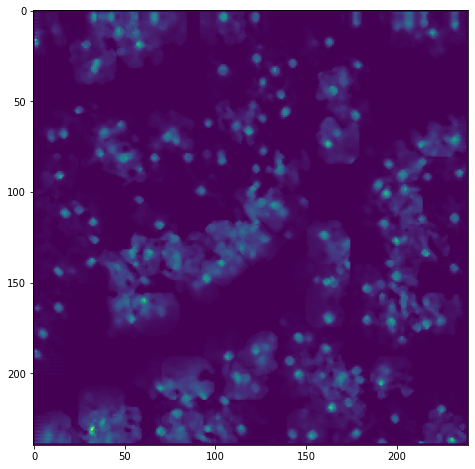

In [40]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(masks.sum(axis=-1))

save the results for future analysis

In [14]:
np.save('masks_old3.npy', masks)

Run entire pipeline on a scan (so that raster correction and motion correction is performed before segmentation

In [87]:
from segmentation_pipelines import extract_masks_old

In [90]:
masks, traces, background_masks, background_traces, raw_traces = extract_masks_old(mini_scan, mmap_scan, **params)

(20, 20)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/lab/users/frank/git_repos/segmentation/caiman_d1_240_d2_240_d3_1_order_C_frames_61717__LOG_ 0_4820'

In [69]:
masks.shape

(240, 240, 136)

Do more comparisons between previous segmentation results and current results 

In [75]:
masks, weights = ((meso.Segmentation.Mask() & key) * (meso.MaskClassification.Type() & 'type="soma"')).fetch('pixels', 'weights')

In [15]:
masks = ((meso.Segmentation.Mask() & key) & 'field=3').get_mask_as_image() # & (meso.MaskClassification.Type() & 'type="soma"')

In [10]:
plt.imshow(masks.sum(axis=-1))

NameError: name 'plt' is not defined

In [16]:
np.save('masks_database_nofilter.npy', masks)